In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
#Written by Heath Mercer
currentDir = os.getcwd()
accelerometerDataPath = os.path.join(currentDir, "data", "all_accelerometer_data_pids_13.csv")
tacDataPath = os.path.join(currentDir, "data", "clean_tac")
phoneTypesPath = os.path.join(currentDir, "data", "phone_types.csv")

In [4]:
#Written by Heath Mercer
csvFiles = glob.glob(os.path.join(tacDataPath, '*.csv'))
print(csvFiles)
tacDataFrames = []

for csvFile in csvFiles:
    tacDataFrames.append(pd.read_csv(csvFile))

['c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\BK7610_clean_TAC.csv', 'c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\BU4707_clean_TAC.csv', 'c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\CC6740_clean_TAC.csv', 'c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\DC6359_clean_TAC.csv', 'c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\DK3500_clean_TAC.csv', 'c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\HV0618_clean_TAC.csv', 'c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\JB3156_clean_TAC.csv', 'c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\JR8022_clean_TAC.csv', 'c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\MC7070_clean_TAC.csv', 'c:\\Users\\mrcat\\Documents\\GitHub\\MLProject\\project\\data\\clean_tac\\MJ8002_clean_TAC.csv', 'c:\\Users\\mrcat\\

In [5]:
#Written by Heath Mercer

tacData = pd.concat(tacDataFrames, ignore_index=True)
accelerometerData = pd.read_csv(accelerometerDataPath)
phoneTypes = pd.read_csv(phoneTypesPath)

In [96]:
#Written by Nathan Padgett
print(tacData.head())
print(accelerometerData.head())
print(phoneTypes.head())


       timestamp  TAC_Reading
0  1493718714000    -0.000482
1  1493720697000     0.001573
2  1493721027000     0.002144
3  1493721357000     0.000877
4  1493721686000    -0.001145
            time     pid       x       y       z phonetype
0              0  JB3156  0.0000  0.0000  0.0000   Android
1              0  CC6740  0.0000  0.0000  0.0000   Android
2  1493733882409  SA0297  0.0758  0.0273 -0.0102    iPhone
3  1493733882455  SA0297 -0.0359  0.0794  0.0037    iPhone
4  1493733882500  SA0297 -0.2427 -0.0861 -0.0163    iPhone
      pid phonetype
0  BK7610    iPhone
1  BU4707    iPhone
2  CC6740   Android
3  DC6359    iPhone
4  DK3500    iPhone


In [7]:
#Written by Nathan Padgett
tacData.isnull().sum()
accelerometerData.isnull().sum()
phoneTypes.isnull().sum()

pid          0
phonetype    0
dtype: int64

In [8]:
#Written by Nathan Padgett
print(tacData)

      timestamp  TAC_Reading
0    1493718714    -0.000482
1    1493720697     0.001573
2    1493721027     0.002144
3    1493721357     0.000877
4    1493721686    -0.001145
..          ...          ...
710  1493797974     0.029049
711  1493799820     0.016286
712  1493801652     0.004243
713  1493803481    -0.001995
714  1493805310    -0.002919

[715 rows x 2 columns]


In [9]:
#Written by Heath Mercer
#Connect accelerometer data with their respective phone types
accelerometerData = accelerometerData.merge(phoneTypes, on='pid')
print(accelerometerData)

                  time     pid         x         y         z phonetype
0                    0  JB3156  0.000000  0.000000  0.000000   Android
1                    0  CC6740  0.000000  0.000000  0.000000   Android
2        1493733882409  SA0297  0.075800  0.027300 -0.010200    iPhone
3        1493733882455  SA0297 -0.035900  0.079400  0.003700    iPhone
4        1493733882500  SA0297 -0.242700 -0.086100 -0.016300    iPhone
...                ...     ...       ...       ...       ...       ...
1048570  1493742311425  JB3156 -0.790259 -0.879167 -0.254394   Android
1048571  1493742311430  HV0618 -0.036200 -0.085200  0.005500    iPhone
1048572  1493742311430  BK7610 -0.217200 -0.184400 -0.434500    iPhone
1048573  1493742311433  SF3079  0.030300  0.098100  0.098000    iPhone
1048574  1493742311440  CC6740  0.020966 -0.010933  0.145366   Android

[1048575 rows x 6 columns]


In [10]:
#Written by Heath Mercer
#Identify bar crawl events (increased movement)
segmentLength = 60
barCrawlEvents = []

tacData['timestamp'] *= 1000
print(tacData)

print(accelerometerData)

         timestamp  TAC_Reading
0    1493718714000    -0.000482
1    1493720697000     0.001573
2    1493721027000     0.002144
3    1493721357000     0.000877
4    1493721686000    -0.001145
..             ...          ...
710  1493797974000     0.029049
711  1493799820000     0.016286
712  1493801652000     0.004243
713  1493803481000    -0.001995
714  1493805310000    -0.002919

[715 rows x 2 columns]
                  time     pid         x         y         z phonetype
0                    0  JB3156  0.000000  0.000000  0.000000   Android
1                    0  CC6740  0.000000  0.000000  0.000000   Android
2        1493733882409  SA0297  0.075800  0.027300 -0.010200    iPhone
3        1493733882455  SA0297 -0.035900  0.079400  0.003700    iPhone
4        1493733882500  SA0297 -0.242700 -0.086100 -0.016300    iPhone
...                ...     ...       ...       ...       ...       ...
1048570  1493742311425  JB3156 -0.790259 -0.879167 -0.254394   Android
1048571  1493742311430  

In [86]:
#Written by Heath Mercer
all_participants_data = pd.DataFrame(columns=accelerometerData.columns)

for participant_id, participant_data in accelerometerData.groupby('pid'):
    participant_data['magnitude'] = np.sqrt(participant_data['x']**2 + participant_data['y']**2 + participant_data['z']**2)
    
    if not participant_data.empty and not participant_data.isnull().all().all():
        all_participants_data = pd.concat([all_participants_data, participant_data], ignore_index=True)

threshold = .01

segments = []
segment_start = None
current_id = None

for index, row in all_participants_data.iterrows():
    if row['magnitude'] > threshold:
        if segment_start is None:
            segment_start = row['time']
            current_id = row['pid']
    else:
        if segment_start is not None:
            segment_end = row['time']
            segments.append((current_id, segment_start, segment_end))
            segment_start = None
            current_id = None

# Create DataFrame for segments
barCrawlEventsDf = pd.DataFrame(segments, columns=['pid', 'segment_start', 'segment_end'])

print(participant_data)
print(barCrawlEventsDf)
print(participant_data.columns)

E:\Temp\Temp2\ipykernel_3004\180234773.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_participants_data = pd.concat([all_participants_data, participant_data], ignore_index=True)


                  time     pid       x       y       z phonetype  magnitude
437429   1493739196712  SF3079 -0.0044  0.0075  0.0109    iPhone   0.013943
437434   1493739196737  SF3079 -0.0055  0.0093  0.0093    iPhone   0.014256
437439   1493739196761  SF3079 -0.0024  0.0121  0.0074    iPhone   0.014385
437443   1493739196787  SF3079  0.0066  0.0012  0.0067    iPhone   0.009481
437449   1493739196811  SF3079  0.0104  0.0035  0.0067    iPhone   0.012857
...                ...     ...     ...     ...     ...       ...        ...
1048550  1493742311327  SF3079  0.0296 -0.0074  0.0064    iPhone   0.031175
1048559  1493742311369  SF3079  0.0108 -0.0031 -0.0358    iPhone   0.037522
1048563  1493742311385  SF3079  0.0314  0.0440 -0.0248    iPhone   0.059473
1048569  1493742311415  SF3079  0.0621  0.0845  0.0441    iPhone   0.113761
1048573  1493742311433  SF3079  0.0303  0.0981  0.0980    iPhone   0.141936

[123166 rows x 7 columns]
          pid  segment_start    segment_end
0      BK7610  14

In [12]:
#Written by Heath Mercer
# Define the TAC threshold
tacThreshold_withThresh = 0.08

# Define tolerance in milliseconds
tolerance_ms = 60 * 10**9

# Merge barCrawlEventsDF with tacdata based on timestamps
merged_data = pd.merge_asof(barCrawlEventsDf.sort_values('segment_start'), 
                            tacData.sort_values('timestamp'),
                            left_on='segment_start', 
                            right_on='timestamp', 
                            direction='nearest',
                            tolerance=tolerance_ms)

# Filter the merged data to include only rows where the TAC reading is above the threshold
filtered_data_above_threshold = merged_data[merged_data['TAC_Reading'] >= tacThreshold_withThresh]
filtered_data_below_threshold = merged_data[merged_data['TAC_Reading'] < tacThreshold_withThresh]
filtered_aboveMergeData = merged_data[merged_data['TAC_Reading'] >= 0]

filtered_aboveMergeData['phonetypes'] = phoneTypes['phonetype']
filtered_participant_data = participant_data[participant_data['magnitude'] >= 1]
filtered_aboveMergeData = pd.merge(filtered_aboveMergeData, filtered_participant_data[['pid', 'magnitude']], on='pid', how='left')



# Print the counts
above_count = filtered_data_above_threshold.shape[0]
below_count = filtered_data_below_threshold.shape[0]

print("Number of bar crawl events above 0.08 TAC readings:", above_count)
print("Number of bar crawl events below 0.08 TAC readings:", below_count)

# Determine which category occurs more frequently
if above_count > below_count:
    print("Bar crawl events above 0.08 TAC readings occur more frequently.")
elif above_count < below_count:
    print("Bar crawl events below 0.08 TAC readings occur more frequently.")
else:
    print("Bar crawl events above and below 0.08 TAC readings occur with equal frequency.")

E:\Temp\Temp2\ipykernel_3004\3521008784.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_aboveMergeData['phonetypes'] = phoneTypes['phonetype']


Number of bar crawl events above 0.08 TAC readings: 5150
Number of bar crawl events below 0.08 TAC readings: 23406
Bar crawl events below 0.08 TAC readings occur more frequently.


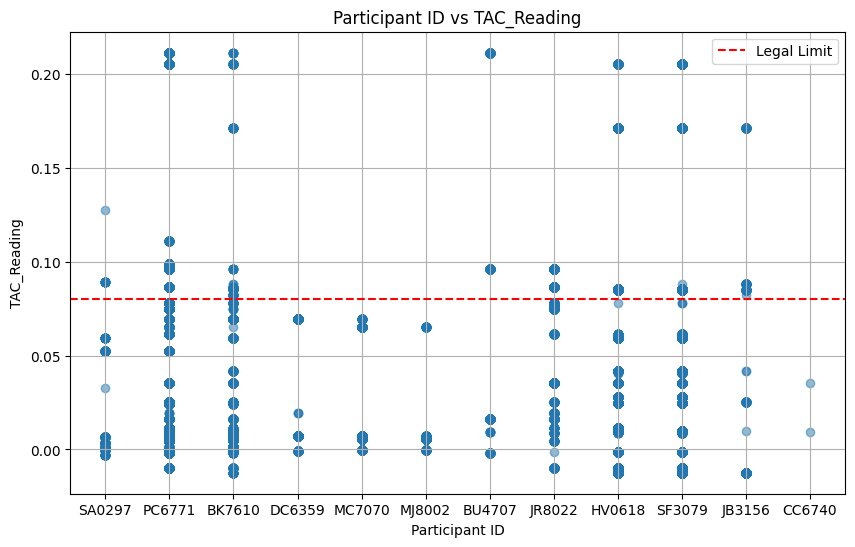

In [106]:
#Written by Nathan Padgett
import matplotlib.pyplot as plt

threshold = 0.08
pid = merged_data['pid']
magnitude = merged_data['TAC_Reading']

plt.figure(figsize=(10, 6))
plt.scatter(pid, magnitude, alpha=0.5)
plt.axhline(y=threshold, color='r', linestyle='--', label='Legal Limit')
plt.title('Participant ID vs TAC_Reading')
plt.xlabel('Participant ID')
plt.ylabel('TAC_Reading')
plt.grid(True)
plt.legend()
plt.show()

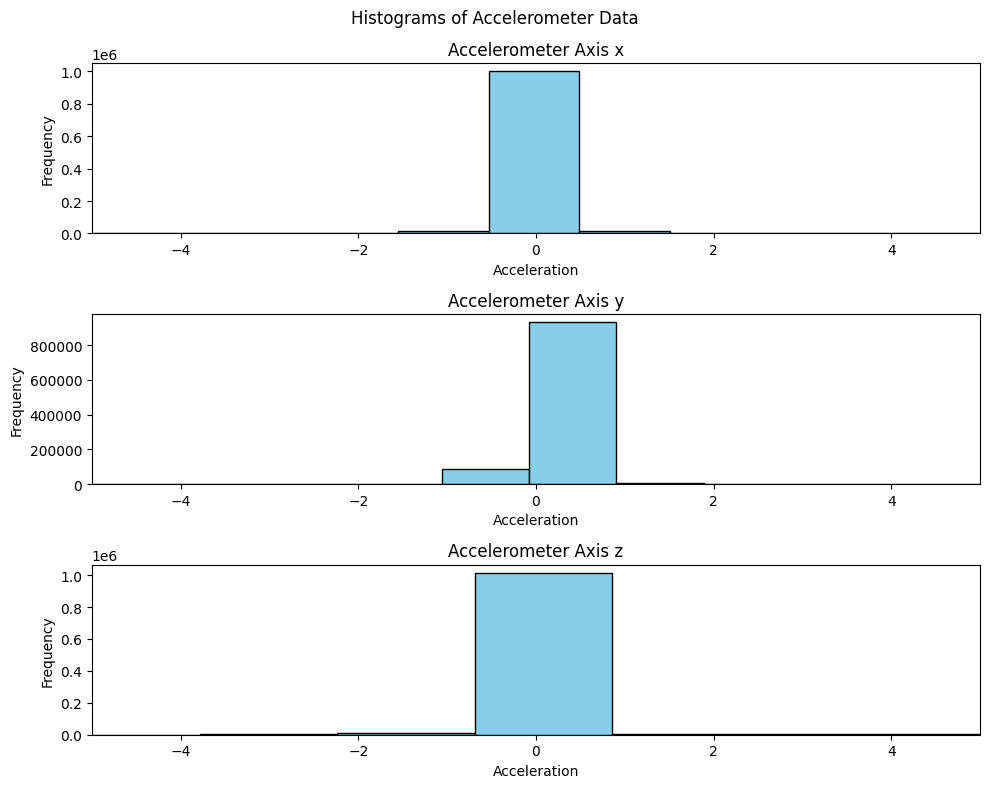

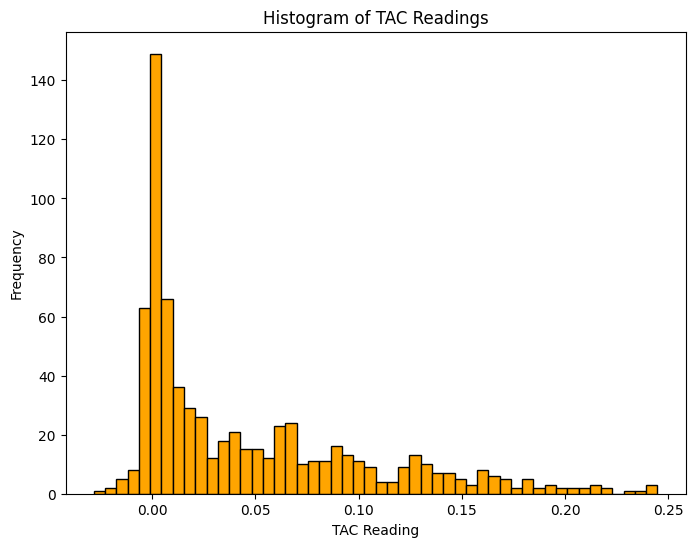

In [13]:
#Written by Nathan Padgett
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
fig.suptitle('Histograms of Accelerometer Data')

for i, axis in enumerate(['x', 'y', 'z']):
    axs[i].hist(accelerometerData[axis], bins=50, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Accelerometer Axis {axis}')
    axs[i].set_xlabel('Acceleration')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim(-5, 5)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(tacData['TAC_Reading'], bins=50, color='orange', edgecolor='black')
plt.title('Histogram of TAC Readings')
plt.xlabel('TAC Reading')
plt.ylabel('Frequency')
plt.show()

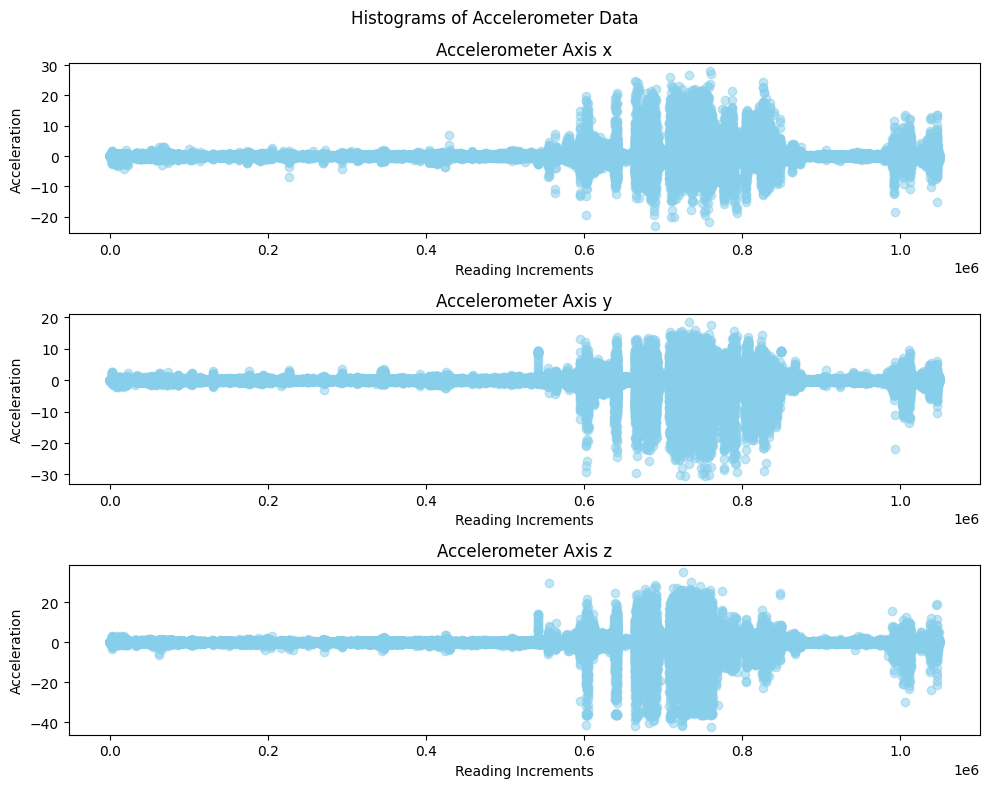

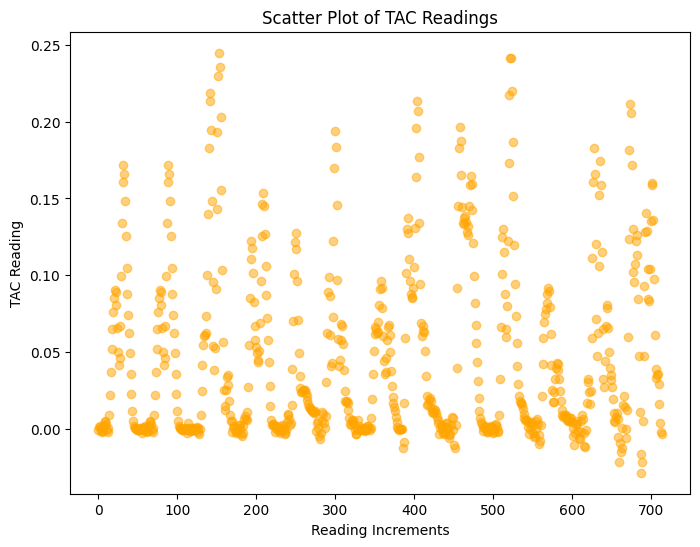

In [108]:
#Written by Nathan padgett
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
fig.suptitle('Histograms of Accelerometer Data')

for i, axis in enumerate(['x', 'y', 'z']):
    axs[i].scatter(range(len(accelerometerData[axis])), accelerometerData[axis], color='skyblue', alpha=0.5)
    axs[i].set_title(f'Accelerometer Axis {axis}')
    axs[i].set_xlabel('Reading Increments')
    axs[i].set_ylabel('Acceleration')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(range(len(tacData['TAC_Reading'])), tacData['TAC_Reading'], color='orange', alpha=0.5)
plt.title('Scatter Plot of TAC Readings')
plt.xlabel('Reading Increments')
plt.ylabel('TAC Reading')
plt.show()

In [77]:
#Written by Nathan Padgett
# Calculate total time for each segment in the filtered data where TAC readings are above the threshold
filtered_aboveMergeData['total_time'] = filtered_aboveMergeData['segment_end'] - filtered_aboveMergeData['segment_start']

# Calculate total time for each segment in the filtered data where TAC readings are below the threshold
filtered_data_below_threshold['total_time'] = filtered_data_below_threshold['segment_end'] - filtered_data_below_threshold['segment_start']

print(filtered_aboveMergeData.columns)

X = filtered_aboveMergeData[['total_time', 'TAC_Reading']]
y = (filtered_aboveMergeData['TAC_Reading'] >= 0.08)

print("Features (X) for segments with TAC readings above threshold:")
print(X)
print("\nTarget variable (y) for segments with TAC readings above threshold:")
print(y)

Index(['pid', 'segment_start', 'segment_end', 'timestamp', 'TAC_Reading',
       'phonetypes', 'magnitude', 'total_time'],
      dtype='object')
Features (X) for segments with TAC readings above threshold:
            total_time  TAC_Reading
0                 8408     0.003425
1                  405     0.003425
2                 1716     0.003425
3                   44     0.003425
4                  180     0.003425
...                ...          ...
4588912            165     0.040862
4588913            165     0.040862
4588914            165     0.040862
4588915            201     0.040862
4588916 -1493742308673     0.040862

[4588917 rows x 2 columns]

Target variable (y) for segments with TAC readings above threshold:
0          False
1          False
2          False
3          False
4          False
           ...  
4588912    False
4588913    False
4588914    False
4588915    False
4588916    False
Name: TAC_Reading, Length: 4588917, dtype: bool


E:\Temp\Temp2\ipykernel_3004\1001433289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_below_threshold['total_time'] = filtered_data_below_threshold['segment_end'] - filtered_data_below_threshold['segment_start']


In [78]:
#Written by Nathan Padgett
X = X.fillna(X.mean())

In [79]:
#Written by Nathan Padgett
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target variable (y_train):", y_train.shape)
print("Shape of testing target variable (y_test):", y_test.shape)

reg = LinearRegression()
reg.fit(X_train, y_train)

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print("Train R^2 score:", train_score)
print("Test R^2 score:", test_score)

Shape of training features (X_train): (3671133, 2)
Shape of testing features (X_test): (917784, 2)
Shape of training target variable (y_train): (3671133,)
Shape of testing target variable (y_test): (917784,)
Coefficients: [3.55703321e-14 6.69475717e+00]
Intercept: -0.13788820432843485
Train R^2 score: 0.6929817697665512
Test R^2 score: 0.6925687749879186


In [80]:
#Written by Nathan Padgett
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9989627188968211


In [81]:
#Written by Heath Mercer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

preprocessor = ColumnTransformer(
    transformers=[
        ('pid', OneHotEncoder(handle_unknown='ignore'), ['pid']),
        ('phonetypes', OneHotEncoder(handle_unknown='ignore'), ['phonetypes'])
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X = filtered_aboveMergeData[['timestamp', 'total_time', 'phonetypes', 'segment_start', 'segment_end', 'pid', 'magnitude']]
y = (filtered_aboveMergeData['TAC_Reading'] >= .08)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9999716708942409


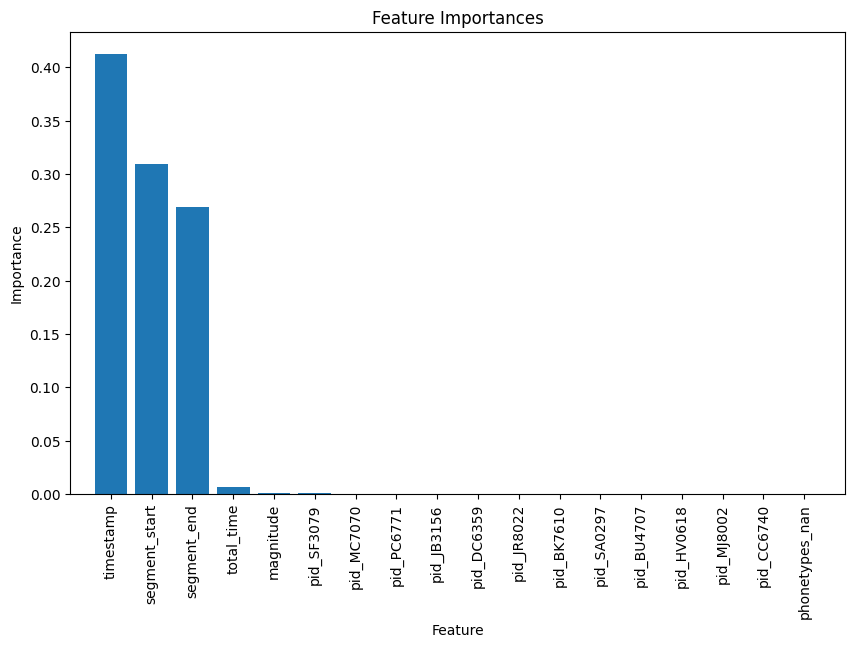

In [82]:
#Written by Heath Mercer
import matplotlib.pyplot as plt

random_forest = pipeline.named_steps['classifier']

feature_importances = random_forest.feature_importances_

one_hot_feature_names = preprocessor.named_transformers_['pid'].get_feature_names_out(input_features=['pid'])
phonetypes_encoded_feature_names = preprocessor.named_transformers_['phonetypes'].get_feature_names_out(input_features=['phonetypes'])
remaining_feature_names = list(X.columns.drop(['pid', 'phonetypes']))

feature_names = list(one_hot_feature_names) + list(phonetypes_encoded_feature_names) + remaining_feature_names

indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), feature_importances[indices], align="center")
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()

In [84]:
#Written by Nathan Padgett
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = filtered_aboveMergeData[['total_time', 'pid']]
y = (filtered_aboveMergeData['TAC_Reading'] >= 0.08)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('pid', OneHotEncoder(handle_unknown='ignore'), ['pid'])
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))
])

pipeline.fit(X_train, y_train)

train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)


print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Train accuracy: 0.7076624573394644
Test accuracy: 0.7079977423881872
